### 1. KNN介绍

KNN，即K nearest neighbor，K近邻算法。KNN的思想非常简单，所需的数学知识较少。比如下图，星星是一个新的样本，要判断星星是属于蓝色的还是黄色的样本分类，就要看它周围的邻居是什么分类。假设K=3，就是看周围三个点的分类，如图，周围有两个红点，一个黄点，应该归类为红色类别。

![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/07/KNN-Algorithm-k3-edureka-437x300.png)

In [4]:
# load data

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = cancer.data
target = cancer.target

In [5]:
data.shape

(569, 30)

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data[target==1,0], data[target==1,1], color = 'green')
plt.scatter(data[target==0,0], data[target==0,1], color = 'orange')
plt.show()

<Figure size 640x480 with 1 Axes>

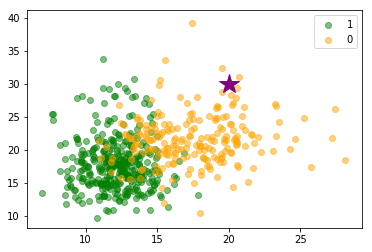

In [7]:
# 创造一个新的点, 并在原图上画出; 此处只用前两个维度的数据
import numpy as np

X = np.array([20, 30])
plt.scatter(data[target==1,0], data[target==1,1], alpha = 0.5, color = 'green', label = '1')
plt.scatter(data[target==0,0], data[target==0,1], alpha = 0.5, color = 'orange', label = '0')
plt.plot(X[0], X[1], color = 'purple', marker = '*', ms = 20)
plt.legend(loc = 'upper right')
plt.show()

### 2. KNN的计算

先计算距离，比较常见的是欧拉距离：

\begin{equation}
dist = \sqrt{\left(x_1 - x_2\right)^2 + \left(y_1 - y_2\right)^2}
\end{equation}

也就是两个点（或者多个点）对应的横纵坐标差的平方和，然后开平方。

对于多个维度的数据，即a和b样本的第一个维度到第n个维度对应值的差的平方和，然后开平方。

\begin{equation}
dist = \sqrt{\sum_{i=1}^{n}\left(X_i^a - X_i^b\right)^2}
\end{equation}

In [8]:
from math import sqrt

distance = []

for t in data[:,:2]:
    d = sqrt (np.sum((t - X)**2))
    distance.append(d)

In [9]:
ind = np.argsort(distance)

In [10]:
from collections import Counter

K = 6

topK_target = target[ind[:K]]
topK_target
c = Counter(topK_target)
c.most_common(1)[0][0]

0

In [11]:
# 以上可以封装为一个函数

def KNN_test(X_train, y_train, test, K):
    distance = []

    for t in X_train:
        d = sqrt(np.sum((t - test)**2))
        distance.append(d)  
    
    ind = np.argsort(distance)
    topK_target = y_train[ind[:K]]
    c = Counter(topK_target)
    return c.most_common(1)[0][0]
    

In [12]:
# 换一个点尝试

KNN_test(data[:, :2], target, np.array([10,10]), 6)
# KNN_test(data[:, :2], target, X, 6)

1

### 3. scikit learn中的封装

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(data[:, :2], target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [15]:
knn.predict(X.reshape(1, -1)) # 注意预测的样本必须是二维的，如果是一维的话会有value error

array([0])

### 4. 重新封装自己的代码

像scikit learn中一样使用。

In [18]:
class KNN_test:
    
    def __init__(self, k):
        assert k >= 1, 'k must be valid!'
        self.k = k
        self._X_train = None # 私有变量
        self._y_train = None
        
    def fit(self, X_train, y_train):
        self._X_train = X_train
        self._y_train = y_train
        return self # 可以不设置任何返回
           
    def predict(self, X_predict):
        assert self._X_train is not None and self._y_train is not None, 'Must fit before predict!'
        assert self._X_train.shape[1] == X_predict.shape[1], 'The length of features must be the same!'
        
        y_predict = [self._y_predict(x) for x in X_predict]
        return np.array(y_predict)
        
    def _y_predict(self, x):
        distance = [sqrt(np.sum((t - x)**2)) for t in self._X_train]  
        ind = np.argsort(distance)
        topK_predict = self._y_train[ind[:self.k]]
        c = Counter(topK_predict)
        return c.most_common(1)[0][0]
    
    def __repr__(self):
        return 'KNN (K = {})'.format(self.k)
    

In [19]:
# 调用
X = np.array([20, 30])
knn_test = KNN_test(k = 6)
knn_test.fit(data[:, :2], target)
knn_test.predict(X.reshape(1, -1))

# x = X
# distance = [sqrt(np.sum((t - x)**2)) for t in data[:,:2]]  
# ind = np.argsort(distance)
# topK_predict = target[ind[:k]]
# c = Counter(topK_predict)
# c.most_common(1)[0][0]

array([0])

### 5. 判断性能

In [20]:
# 自己实现split

def split(X, y, test_ratio = 0.2, seed = None):    
    
    assert 0 < test_ratio < 1, 'test ratio must be valid!'
    assert X.shape[0] == y.shape[0], 'The length of X and y must be the same!'
    
    if seed:
        np.random.seed(seed)
    
    shuffle_indexes = np.random.permutation(len(X)) # 生成随机索引
    
    test_size = int(len(X) * test_ratio)
    test_indexes = shuffle_indexes[:test_size] # 也可以选别的位置的
    train_indexes = shuffle_indexes[test_size:]
    
    X_train = X[train_indexes]
    X_test = X[test_indexes]
    
    y_train = y[train_indexes]
    y_test = y[test_indexes]
    
    return X_train, X_test, y_train, y_test
    
    

In [21]:
X_train, X_test, y_train, y_test = split(data[:, :2], target)

knn_test = KNN_test(k = 9)
knn_test.fit(X_train, y_train)
y_predict = knn_test.predict(X_test)
sum(y_predict == y_test) / len(y_test)

0.8672566371681416

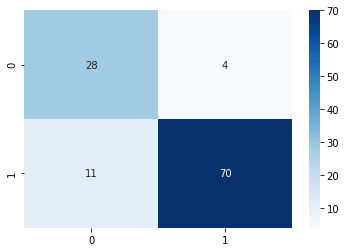

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix_result = confusion_matrix(y_predict, y_test)
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.show()

In [24]:
# 在sklearn中的使用

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[:, :2], target, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
sum(y_predict == y_test)/len(y_test)

0.8859649122807017

### 6. 分类准确度

In [25]:
from sklearn import datasets

digits = datasets.load_digits()

In [26]:
X = digits.data
y = digits.target

In [27]:
X.shape
y.shape

(1797,)

In [28]:
# 寻找一个数字试一试

some_digit = X[1]
some_digit.shape

(64,)

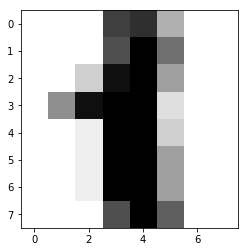

In [29]:
import matplotlib

some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [30]:
# for x in X_test:
#     distance = [sqrt(np.sum((t - x)**2)) for t in X_train]  
#     ind = np.argsort(distance)
#     topK_target = target[ind[:K]]
#     c = Counter(topK_target)
k=3
# target[ind[:k]]
# ind[:k]


In [33]:
X_train, X_test, y_train, y_test = split(X, y)

knn_test = KNN_test(k = 3)
knn_test.fit(X_train, y_train)
y_predict = knn_test.predict(X_test)
sum(y_predict == y_test) / len(y_test)

0.9860724233983287

In [31]:
# 计算准确度

def accuracy_score(y_true, y_predict):
    assert y_true.shape[0] == y_predict.shape[0], \
    "The size of y_true must be equal to the size of y_predict!"
    
    return sum(y_predict == y_true) / len(y_true)



In [34]:
accuracy_score(y_test, y_predict)

0.9860724233983287

In [35]:
### 以下是使用scikit learn中的使用

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.9944444444444445

### 7. 超参数

KNN算法并没有模型参数，其中的k是典型的超参数。

In [39]:
best_score = 0
best_k = -1

for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_predict = knn_clf.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    if score > best_score:
        best_score = score
        best_k = k
print("best k is {}; \nbest score is {}.".format(best_k, best_score))

best k is 7; 
best score is 0.9972222222222222.


另外一个超参数（隐藏），就是距离。假如k=3，看周围三个点的颜色，但是周围三个点的距离可能有很大差别，因为需要考虑一个权重问题 \
(可以将距离的倒数设置为权重)；

假如分类的样本同样是3 （等于k），周围三个点又都是三类，这样普通的KNN只能随机选一个；

在sklearn中有一个weights参数，即距离的权重，默认不考虑距离


In [41]:
best_method = ""

best_score = 0
best_k = -1

for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights = method)
        knn_clf.fit(X_train, y_train)
        y_predict = knn_clf.predict(X_test)
        score = accuracy_score(y_test, y_predict)
        if score > best_score:
            best_score = score
            best_k = k
            best_method = method
            
print("best k is {}; \nbest score is {};\nbest method is {}.".format(best_k, best_score, best_method))

best k is 7; 
best score is 0.9972222222222222;
best method is uniform.


以上距离是用的欧拉距离：

\begin{equation}
E\_dist = \sum_{i=1}^{n}\left(|X_i^a - X_i^b|\right)
\end{equation}

此外，还有曼哈顿距离：

\begin{equation}
M\_dist = \sqrt{\sum_{i=1}^{n}\left(X_i^a - X_i^b\right)^2}
\end{equation}

也可以写为：

\begin{equation}
M\_dist = \sum_{i=1}^{n}\left(|X_i^a - X_i^b|^2\right)^\frac{1}{2}
\end{equation}

这两者距离可以概括为：

\begin{equation}
dist = \sum_{i=1}^{n}\left(|X_i^a - X_i^b|^p\right)^\frac{1}{p}
\end{equation}

这也就是明科夫斯基距离（Minkowski Distance）。

In [45]:
%%time
# 寻找明科夫斯基距离最优的p

best_p = -1
best_score = 0
best_k = -1

for p in range(1, 6):
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = p)
        knn_clf.fit(X_train, y_train)
        y_predict = knn_clf.predict(X_test)
        score = accuracy_score(y_test, y_predict)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
            
print("best k is {}; \nbest score is {};\nbest p is {}.".format(best_k, best_score, best_p))

best k is 7; 
best score is 0.9972222222222222;
best p is 2.
CPU times: user 16.6 s, sys: 116 ms, total: 16.8 s
Wall time: 17.2 s


这种搜索方式其实就是网格搜索。scikit learn中也有封装好的方法。

### 8. 网格化搜索

对于一些参数是存在一些依赖关系的，为了更加方面的搜索，scikit learn封装了Grid Search方法。

In [47]:
# 定义搜索参数

param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [46]:
knn_clf = KNeighborsClassifier()

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
%%time

grid_search = GridSearchCV(knn_clf, param_grid)
grid_search.fit(X_train, y_train)

CPU times: user 2min 17s, sys: 565 ms, total: 2min 18s
Wall time: 2min 19s


In [53]:
# 最佳参数
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [54]:
# 最佳分数
grid_search.best_score_

0.9805149617258176

In [55]:
# 最佳提供参数
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [56]:
# 预测

knn_clf = grid_search.best_estimator_
knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 3, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [57]:
%%time

# n_jobs为计算机分配几个核并行处理任务，默认为1; 如果是-1，则用计算机所有的核

grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

CPU times: user 491 ms, sys: 287 ms, total: 778 ms
Wall time: 1min 10s


In [60]:
%%time

# verbose参数可以输出搜索状态，越大输出的内容越详细

grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform ..................................[CV] n_neighbors=1, weights=uniform ..................................[CV] n_neighbors=1, weights=uniform ..................................


[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.2s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.2s
[CV] n_neighbors=2, weights=uniform ..................................[CV] ................... n_neighbors=1, weights=uniform, total=   0.3s

[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.3s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.3s
[CV] n_neighbor

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s


[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.1s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.2s[CV] ............. n_neighbors=1, p=4, weights=distance, total=   1.1s

[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   1.2s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.8s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] ............. n_neighbors=1, p=5, weights=distance, total=   0.9s
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   1.0s[CV] n_neighbors=2, p=1, weights=distance ............................

[CV] n_neighbors=2, p=1, weights=distance ............................
[CV] .

[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=4, p=5, weights=distance, total=   1.1s
[CV] n_neighbors=5, p=3, weights=distance ............................
[CV] ............. n_neighbors=4, p=5, weights=distance, total=   1.1s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   1.1s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   1.1s
[CV] n_neighbors=5, p=4, weights=distance ............................
[CV] ............. n_neighbors=5, p=3, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=5, weights=distance ............................
[CV] ............. n_neighbors=5, p=4, weights=distance, total=   1.0s
[CV] n_neighbors=5, p=5, weights=distance ............................
[CV] ............. n_neighbors=5, p=4, weights=distance, total=   1.0s
[CV] n

[CV] n_neighbors=9, p=2, weights=distance ............................[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s

[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.1s
[CV] n_neighbors=9, p=3, weights=distance ............................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min


[CV] ............. n_neighbors=8, p=5, weights=distance, total=   1.3s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=8, p=5, weights=distance, total=   0.9s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   0.9s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   0.9s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=9, p=3, weights=distance, total=   0.9s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] ............. n_neighbors=9, p=4, weights=distance, total=   0.9s
[CV] n_neighbors=9, p=5, weights=distance ............................
[CV] ............. n_neighbors=9, p=4, weights=distance, total=   0.9s
[CV] ............. n_neighbors=9, p=4, weights=distance, total=   0.8s
[CV] n

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


此外，还有更多的距离：
<br>
1). 向量空间余弦相似度；
<br>
2). 调整余弦相似度；
<br>
3). 皮尔森相关系数；
<br>
4). Jaccard相似系数；

### 9. 数据归一化（Feature Scaling）

将所有的数据都映射到同一尺度。

1). 最值归一化: 将所有数据都映射到0-1之间。适用于分布有明显边界的情况；受outlier的影响较大。

\begin{equation}
X_{scale} = \frac{x-x_{min}}{x_{max}-x_{min}}
\end{equation}

2). 均值方差归一化: 将所有数据都归一到均值为0方差为1的分布中。


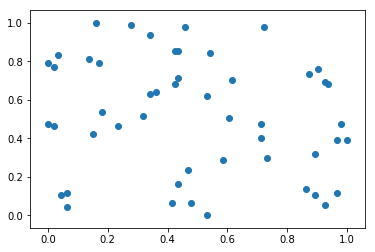

In [69]:
# 最值归一化

# 一维数组
x = np.random.randint(0, 100, size = 100)
(x - np.min(x)) / (np.max(x) - np.min(x))

# 二维数组
X = np.random.randint(0, 100, (50,2))
X = np.array(X, dtype='float')

for n in range(2):
    X[:,n] = (X[:, n] - np.min(X[:,n])) / (np.max(X[:,n]) - np.min(X[:,n]))

plt.scatter(X[:,0], X[:,1])
plt.show()

# 已经在0-1之间

In [71]:
np.mean(X[:,0])
np.std(X[:,0])

0.3174781799569147

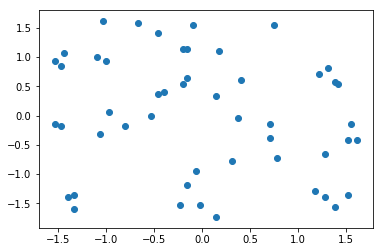

In [73]:
# 均值方差归一化

X2 = np.random.randint(0, 100, (50,2))
X2 = np.array(X, dtype='float')

for n in range(2):
    X2[:,n] = (X2[:, n] - np.mean(X2[:,n])) / np.std(X2[:,n])

plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [77]:
np.mean(X2[:,0]) # 接近于0
np.std(X2[:,0]) # 接近于1

0.9999999999999998

In [78]:
# scikit learn中的Scaler
# 对测试数据集归一化的时候，应该用(x_test - mean_train)/std_train计算，用训练数据集；

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)


In [85]:
knn_clf.fit(X_train_standard, y_train)
knn_clf.score(X_test_standard, y_test)

0.9777777777777777

### 10. KNN的缺点

1). 效果比较低下，可以使用树结构优化（KD TRee；Ball Tree）;
<br>
2). 对outlier敏感，高度数据相关；
<br>
3). 不具有可解释性；
<br>
4). 随着维数的增加，看似相近的两个点，距离会越来越大（维数灾难）：
<br>
    比如0到1，距离为1，(0,0)到(1,1)，距离为1.414；(0,0,0)到(1,1,1)，距离为1.73；...而有10000维的时候，距离有100.
    